# Revised Hidden Weight Boolean Function

Define variables:

In [99]:
z, p, q, r, u, v = var("z p q r u v")

For an even integer $n\geq 0$ and a Boolean vector $a=(a_i)_{i\in[1,n]}\in\mathbb F_2^n$, define:
- $p=p(a)$ to be the number of odd integers $i$ with $(a_i,a_{i+1})=(0,0)$.
- $q=q(a)$ to be the number of odd integers $i$ with $(a_i,a_{i+1})=(1,1)$.
- $r=p(a)$ to be the number of odd integers $i$ with $(a_i,a_{i+1})\in\{(0,1),(1,0)\}$.

It then holds that $p+q+r=n/2$. Consider then the polynomial $P_a(z)=(-z^2+2z+1)^p\cdot(-z^2-2z+1)^q\cdot(z^2+1)^r$. We can then write:
$$P_a(z)=\sum_{k=0}^n\mathsf D_{n,k,a}z^k,\qquad\mathsf D_{n,k,a}\in\mathbb Z.$$

In [100]:
P_a = (-z ^ 2 + 2 * z + 1) ^ p * (-z ^ 2 - 2 * z + 1) ^ q * (z ^ 2 + 1) ^ r

Through derivation, we can get $\mathsf D_{n,k,a}$ explicitly for small $k$:

In [101]:
k = 3

D_nka = diff(P_a, z, k)(z=0) / factorial(k)
print(f"D_(n, {k}, a) equals:\n    {D_nka.expand().factor()}")

D_(n, 3, a) equals:
    2/3*(2*p^2 - 4*p*q + 2*q^2 - 9*p - 9*q + 3*r + 7)*(p - q)


For a given $n$, the following outputs $\mathsf D_{n,k,a}$ for all $k\in[0,n/2]$:

In [102]:
n = 16

for k in range(n / 2 + 1):
    D_nka = diff(P_a, z, k)(z=0) / factorial(k)
    print(f"D_({n}, {k}, a) equals:\n    {D_nka.expand().subs(r=n/2-p-q).factor()}")

D_(16, 0, a) equals:
    1
D_(16, 1, a) equals:
    2*p - 2*q
D_(16, 2, a) equals:
    2*p^2 - 4*p*q + 2*q^2 - 4*p - 4*q + 8
D_(16, 3, a) equals:
    2/3*(2*p^2 - 4*p*q + 2*q^2 - 12*p - 12*q + 31)*(p - q)
D_(16, 4, a) equals:
    2/3*p^4 - 8/3*p^3*q + 4*p^2*q^2 - 8/3*p*q^3 + 2/3*q^4 - 8*p^3 + 8*p^2*q + 8*p*q^2 - 8*q^3 + 100/3*p^2 - 104/3*p*q + 100/3*q^2 - 40*p - 40*q + 28
D_(16, 5, a) equals:
    2/15*(2*p^4 - 8*p^3*q + 12*p^2*q^2 - 8*p*q^3 + 2*q^4 - 40*p^3 + 40*p^2*q + 40*p*q^2 - 40*q^3 + 270*p^2 - 60*p*q + 270*q^2 - 740*p - 740*q + 823)*(p - q)
D_(16, 6, a) equals:
    4/45*p^6 - 8/15*p^5*q + 4/3*p^4*q^2 - 16/9*p^3*q^3 + 4/3*p^2*q^4 - 8/15*p*q^5 + 4/45*q^6 - 8/3*p^5 + 8*p^4*q - 16/3*p^3*q^2 - 16/3*p^2*q^3 + 8*p*q^4 - 8/3*q^5 + 248/9*p^4 - 416/9*p^3*q + 112/3*p^2*q^2 - 416/9*p*q^3 + 248/9*q^4 - 128*p^3 + 256/3*p^2*q + 256/3*p*q^2 - 128*q^3 + 12166/45*p^2 - 7052/45*p*q + 12166/45*q^2 - 628/3*p - 628/3*q + 56
D_(16, 7, a) equals:
    2/315*(4*p^6 - 24*p^5*q + 60*p^4*q^2 - 80*p^3*q^3 + 6

It may be useful to express $\mathsf D_{n,k,a}$ not as a polynomial in $p, q, r$, but rather as a polynomial in $u,v,r$ with $u=p-q$ and $v=p+q$:

In [103]:
k = 3

D_nka = diff(P_a, z, k)(z=0) / factorial(k)
D_nka = D_nka.subs(p=(v + u) / 2, q=(v - u) / 2)
print(f"D_(n, {k}, a) equals:\n    {D_nka.expand().factor()}")

D_(n, 3, a) equals:
    2/3*(2*u^2 + 3*r - 9*v + 7)*u


For every $k\in[0,n]$, let $\mathsf M_{n,k}=\max_a\mathsf D_{n,k,a}$ and $\mathsf N_{n,k}=\min_a\mathsf D_{n,k,a}$. The following computes $\mathsf M_{n,k}$ and $\mathsf N_{n,k}$ for every $k$, and also finds the tuples $(p,q,r)$ for which $\mathsf D_{n,k,a}=\mathsf M_{n,k}$ and for which $\mathsf D_{n,k,a}=\mathsf N_{n,k}$.

In [104]:
n = 50

max_pqr = [[] for k in range(n + 1)]
M_nk = [0 for k in range(n + 1)]
min_pqr = [[] for k in range(n + 1)]
N_nk = [0 for k in range(n + 1)]

for p in range(n / 2 + 1):
    for q in range(n / 2 + 1):
        r = n / 2 - p - q
        if r < 0:
            continue
        coeffs = P_a(p=p, q=q, r=r).list()
        for k in range(n + 1):
            if coeffs[k] == M_nk[k]:
                max_pqr[k].append((p, q, r))
            elif coeffs[k] > M_nk[k]:
                max_pqr[k] = [(p, q, r)]
                M_nk[k] = coeffs[k]
            if coeffs[k] == N_nk[k]:
                min_pqr[k].append((p, q, r))
            elif coeffs[k] < N_nk[k]:
                min_pqr[k] = [(p, q, r)]
                N_nk[k] = coeffs[k]

We can then plot the points $(k,\mathsf M_{n,k})$ and the points $(k,\mathsf N_{n,k})$.

Plotting the points (k, M_(n, k)) for every k:


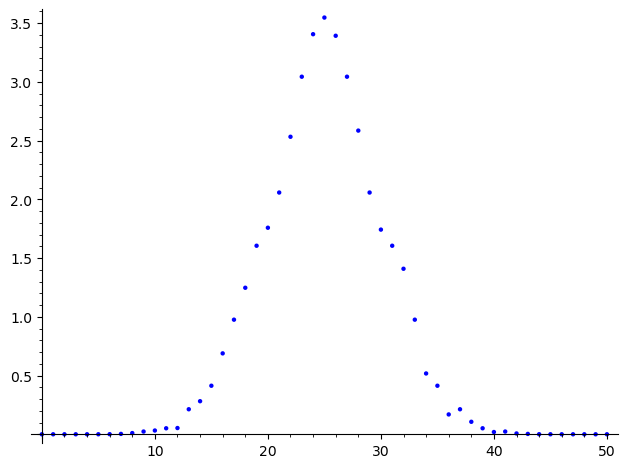

Plotting the points (k, N_(n, k)) for every k:


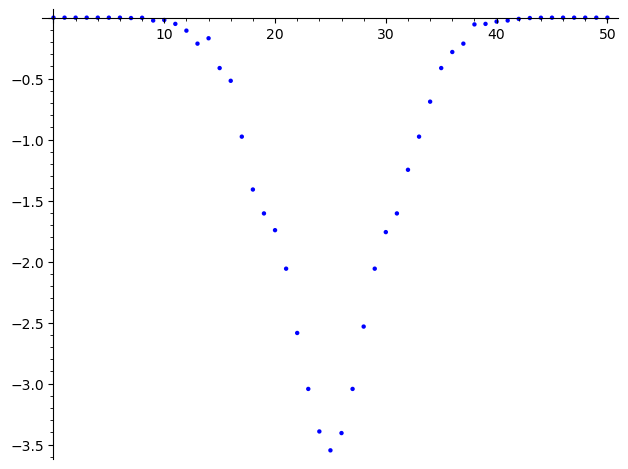

In [105]:
print("Plotting the points (k, M_(n, k)) for every k:")
show(list_plot(M_nk))
print("Plotting the points (k, N_(n, k)) for every k:")
show(list_plot(N_nk))

We conjecture that the values of $\sum_{k=0}^n\mathsf M_{n,k}$ and $-\sum_{k=0}^n\mathsf N_{n,k}$ are bounded by $2^{3n/4+2}$:

In [106]:
print(
    f"The sum of the M_({n},k) is equal to 2^(3*{n}/4 + {(log(sum(M_nk), 2) - 3 * n / 4).n(digits=3)})"
)
print(
    f"The sum of the - N_({n},k) is equal to 2^(3*{n}/4 + {(log(-sum(N_nk), 2) - 3 * n / 4).n(digits=3)})"
)

The sum of the M_(50,k) is equal to 2^(3*50/4 + 1.05)
The sum of the - N_(50,k) is equal to 2^(3*50/4 + 1.05)
